# Starter Code

In [102]:
import os
import gc
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages

from boltzmann_machine import BoltzmannMachine

from utils import (plot_sigmoid,
                   get_encprob_env_states, 
                   get_encprob_weight_mask, 
                   gen_free_state_dist_pdf, 
                   gen_clamped_state_dist_pdf, 
                   gen_learning_plots_pdf,
                   get_boltzmann_distribution,
                   get_probs_from_counts,
                   plot_series,
                   generate_binary_vectors,
                   get_clamped_run_scores,
                   get_free_run_scores)

grp_size = 8
num_hnodes = 3
env_states = get_encprob_env_states(grp_size)
weight_mask = get_encprob_weight_mask(grp_size, num_hnodes) 

In [103]:
base_dir = './838_saved_runs/x_32/'

In [104]:
with open(f'{base_dir}/bm_object_free_run_debug.pkl', 'rb') as inp:
    free_run_debug = pickle.load(inp)

with open(f'{base_dir}/bm_object_clamped_run_debug.pkl', 'rb') as inp:
    clamped_run_debug = pickle.load(inp)

with open(f'{base_dir}/bm_object_learning_debug.pkl', 'rb') as inp:
    learning_debug = pickle.load(inp)

total_num_files = len([fname for fname in os.listdir(base_dir) 
                        if 'bm_object_free_run_debug' in fname])
files_to_load = total_num_files-1 

for i in range(files_to_load):
    with open(f'{base_dir}/bm_object_free_run_debug_{i+1}.pkl', 'rb') as inp:
        free_run_debug.extend(pickle.load(inp)) 

    with open(f'{base_dir}/bm_object_clamped_run_debug_{i+1}.pkl', 'rb') as inp:
        clamped_run_debug.extend(pickle.load(inp))

    with open(f'{base_dir}/bm_object_learning_debug_{i+1}.pkl', 'rb') as inp:
        learning_debug.extend(pickle.load(inp))


bm = BoltzmannMachine(env_states, num_hnodes, weight_mask)
bm.free_run_debug = free_run_debug
bm.clamped_run_debug = clamped_run_debug
bm.learning_debug = learning_debug
print('Number of cycles: ', len(bm.learning_debug))

#--------------------------------------------------
p_matrix_series = []
p_prime_matrix_series = []
dir_matrix_series = []
W_matrix_series = []

for i in range(len(bm.learning_debug)):
    p_matrix_series.append(bm.learning_debug[i]['p'])
    p_prime_matrix_series.append(bm.learning_debug[i]['p_prime'])
    dir_matrix_series.append(bm.learning_debug[i]['direction'])
    W_matrix_series.append(bm.learning_debug[i]['W'])

p_matrix_series = np.stack(p_matrix_series, axis=0)
p_prime_matrix_series = np.stack(p_prime_matrix_series, axis=0)


# dir_matrix_series = np.stack(dir_matrix_series, axis=0)
dir_matrix_series = p_matrix_series-p_prime_matrix_series
# dir_matrix_series = dir_matrix_series.reshape((200, 2, 11, 11)).mean(axis=1) #***********************


W_matrix_series = np.stack(W_matrix_series, axis=0)
#--------------------------------------------------


Number of cycles:  4000


46.0 -82.0


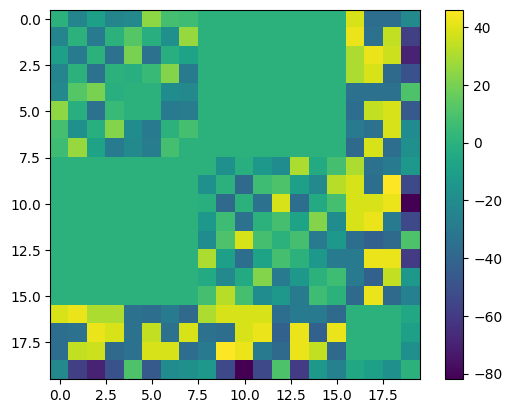

array([[  0., -24., -10., -24., -22.,  24.,   8.,   6.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  38., -36., -36., -22.],
       [-24.,   0., -30.,   0.,  12.,  -2., -18.,  26.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  42., -34.,  34., -58.],
       [-10., -30.,   0., -34.,  20., -34.,  -2.,  -8.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  30.,  42.,  36., -70.],
       [-24.,   0., -34.,   0.,  -2.,   4.,  22., -30.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  30.,  38., -38., -50.],
       [-22.,  12.,  20.,  -2.,   0.,   0., -20., -22.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., -34., -34., -34.,  10.],
       [ 24.,  -2., -34.,   4.,   0.,   0., -30., -28.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., -36.,  34.,  38., -46.],
       [  8., -18.,  -2.,  22., -20., -30.,   0.,   8.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., -30., -34.,  38., -20.],
       [  6.,  26.,  -8., -30., -22., -28

In [105]:
W = W_matrix_series[-1]
print(W.max(), W.min())
plt.imshow(W)
plt.colorbar()
plt.show()
W

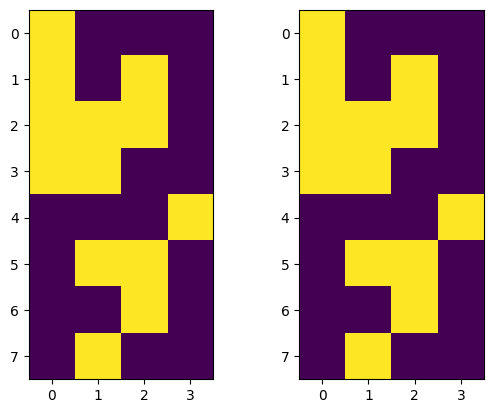

In [106]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.sign(W[:8, -4:]))
ax2.imshow(np.sign(W[8:16, -4:]))

In [107]:
np.unique(np.sign(W[:8, -4:-1]), axis=0).shape, np.unique(np.sign(W[8:16, -4:-1]), axis=0).shape

((8, 3), (8, 3))

In [108]:
ranks = []
for i, clamped_debug_list in enumerate(bm.clamped_run_debug[:]):
    [bm.clamped_run_eval(clamped_dist) 
     for clamped_dist in clamped_debug_list]

    top_ranks = bm.free_run_eval(bm.free_run_debug[i])[:8]
    num_top_ranks = len(top_ranks)
    if num_top_ranks<8:
        top_ranks = np.append(top_ranks, (-1)*np.ones(8-num_top_ranks))
    ranks.append(top_ranks)

ranks = np.array(ranks, dtype=int)

[1. 1. 1.], [1. 1. 1.], [1. 0. 0.], [0. 1. 0.], [1. 1. 0.], [0. 0. 0.], [1. 0. 1.], [1. 0. 0.], [262, 263, 589, 10966, 10967, 10968, 10969] W_range: (False, True)
[0. 0. 0.], [1. 0. 0.], [0. 0. 0.], [1. 0. 0.], [1. 0. 0.], [0. 1. 1.], [1. 0. 0.], [0. 0. 0.], [40, 49, 58, 67, 76, 85, 94, 102, 164, 176, 189, 204, 220, 235, 252, 271, 751, 752, 769, 770, 787, 802, 803, 821, 855, 856, 872, 873, 966, 1001, 1002, 1072, 1073, 1171, 1172, 1293, 1460, 1461, 1665, 1666, 1909, 3086, 3169, 3262, 3378, 3504, 3981, 4296, 5281] W_range: (False, True)
[0. 0. 0.], [0. 0. 0.], [0. 0. 0.], [1. 0. 0.], [0. 0. 1.], [0. 0. 0.], [1. 0. 0.], [0. 0. 0.], [76, 89, 102, 115, 128, 141, 154, 167, 214, 225, 237, 250, 264, 279, 295, 312, 348, 349, 394, 395, 449, 450, 515, 516, 590, 591, 676, 677, 772, 773, 878, 879, 1006, 1007, 1023, 1024, 1042, 1043, 1063, 1064, 1087, 1088, 1112, 1113, 1140, 1141, 1170, 1171, 1291, 1323, 1391, 1496, 1641, 1825, 2048, 2316, 2616, 2720, 2840, 3143, 3352, 3919] W_range: (False, True)
[

[0, 2, 4, 6, 10, 11, 14, 23, 30, 31, 57, 97, 116, 117, 124, 137, 144, 169, 185, 195, 259, 413, 475, 476, 494, 588, 666, 899, 960, 1003, 1230] W_range: (False, True)
[1. 0. 1.], [1. 0. 1.], [1. 1. 0.], [1. 1. 0.], [0. 1. 0.], [0. 1. 1.], [0. 0. 1.], [0. 1. 0.], [0, 1, 3, 5, 8, 9, 15, 17, 20, 45, 63, 77, 78, 87, 95, 107, 162, 166, 213, 217, 240, 355, 430, 481, 601, 692, 756, 757, 843, 956, 1081, 1172, 1208] W_range: (False, True)
[1. 0. 0.], [1. 0. 1.], [1. 1. 0.], [1. 1. 0.], [0. 1. 0.], [0. 1. 1.], [0. 0. 1.], [0. 1. 0.], [0, 1, 4, 5, 8, 9, 24, 40, 41, 47, 69, 89, 91, 107, 108, 118, 130, 136, 183, 206, 250, 459, 460, 571, 631, 654, 943, 1089, 1092, 1135, 1302] W_range: (False, True)
[1. 0. 1.], [1. 0. 1.], [1. 1. 0.], [1. 1. 0.], [0. 1. 0.], [0. 1. 1.], [0. 0. 1.], [0. 1. 0.], [0, 1, 2, 8, 9, 10, 16, 18, 24, 34, 54, 70, 82, 99, 101, 106, 118, 146, 193, 224, 273, 386, 405, 443, 579, 716, 717, 777, 892, 911, 1048, 1076, 1199, 1221, 1381] W_range: (False, True)
[1. 0. 1.], [1. 0. 1.], [1.

In [109]:
free_run_scores = []
for free_run_dict in bm.free_run_debug:
    sorted_energies = np.array(sorted(zip(free_run_dict['state_energies'], 
                                            np.arange(len(free_run_dict['state_energies']))), 
                                        key=lambda x: x[0])
                                )
    sorted_states = free_run_dict['states'][sorted_energies[:, 1].astype(int)]
    
    res = []
    for env_state in env_states:
        mask = (sorted_states[:, :bm.num_vnodes] == env_state).all(axis=1)
        res.append(mask[:env_states.shape[0]].any())
    free_run_scores.append(np.array(res).sum())


fig = px.line(y=free_run_scores, title='Free Run Scores')
fig.add_hline(y=8)

In [110]:
fig = px.line(y=get_clamped_run_scores(bm), title='Clamped Run Scores')
fig.add_hline(y=8)

In [111]:
print('>>>>>>>>>>>', get_free_run_scores(bm)[-100:].sum()/100)

>>>>>>>>>>> 0.79


In [112]:
fig = px.line(y=ranks[10:, 7], title='8th rank progression')
fig.add_hline(y=7)

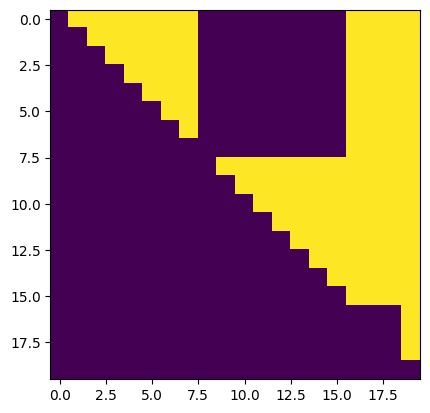

In [113]:
connections = np.zeros((bm.num_nodes, bm.num_nodes), dtype=bool)

first_grp_connections = connections.copy()
first_grp_connections[:grp_size, :grp_size] = True
np.fill_diagonal(first_grp_connections, 0)
first_grp_connections = np.triu(first_grp_connections)
first_grp_concts_idxs = np.nonzero(first_grp_connections)

sec_grp_connections = connections.copy()
sec_grp_connections[grp_size:2*grp_size, grp_size:2*grp_size] = True
np.fill_diagonal(sec_grp_connections, 0)
sec_grp_connections = np.triu(sec_grp_connections)
sec_grp_concts_idxs = np.nonzero(sec_grp_connections)

first_to_hidd_connections = connections.copy()
first_to_hidd_connections[:grp_size, -num_hnodes-1:-1] = True
first_to_hidd_concts_idxs = np.nonzero(first_to_hidd_connections)

sec_to_hidd_connections = connections.copy()
sec_to_hidd_connections[grp_size:2*grp_size, -num_hnodes-1:-1] = True
sec_to_hidd_concts_idxs = np.nonzero(sec_to_hidd_connections)

all_to_bias_connections = connections.copy()
all_to_bias_connections[:-1, -1] = True
all_to_bias_concts_idxs = np.nonzero(all_to_bias_connections)

plt.imshow(first_grp_connections+sec_grp_connections + first_to_hidd_connections + sec_to_hidd_connections + all_to_bias_connections)
plt.show()

In [114]:
def get_series_data(idxs_arr):
    series_data1 = p_matrix_series[:, idxs_arr[0], idxs_arr[1]] 
    series_data2 = p_prime_matrix_series[:, idxs_arr[0], idxs_arr[1]] 
    series_data12 = dir_matrix_series[:, idxs_arr[0], idxs_arr[1]]
    series_data3 = W_matrix_series[:, idxs_arr[0], idxs_arr[1]]
    return series_data1, series_data2, series_data12, series_data3


def plot_group(idxs_arr, plot_dir=False, plot_W=False):
    _, _, series_data12, series_data3 = get_series_data(idxs_arr)

    if plot_W:
        fig = go.Figure()
        for i in range(series_data3.shape[1]):
            fig.add_trace(go.Scatter(y=series_data3[:, i],
                                        mode='lines', 
                                        # marker_color = 'orange',
                                        name = f'W_{i+1}'))
        fig.update_layout(
            title=dict(
                text= f'W'
            ))
        fig.add_hline(y=0)
        fig.show()

    if plot_dir:
        fig = go.Figure()
        for i in range(series_data12.shape[1]):
            fig.add_trace(go.Scatter(y=series_data12[:, i],
                                    mode='lines', 
                                    marker_color = 'blue',
                                    name = f'dir_{i+1}'))
        fig.update_layout(
            title=dict(
                text= f'dir'
            ))
        fig.add_hline(y=0)
        fig.show()

def plot_group_to_hidd(idxs_arr, plot_dir=False, plot_W=False):
    _, _, series_data12, series_data3 = get_series_data(idxs_arr)
    
    idxs_arr = np.arange(series_data3.shape[1]).reshape((-1, 3))
    colors = ['red', 'green', 'blue']

    if plot_W:
        for i, idxs in enumerate(idxs_arr):
            fig = go.Figure()
            for j, k in enumerate(idxs):
                fig.add_trace(go.Scatter(y=series_data3[:, k],
                                            mode='lines', 
                                            marker_color = colors[j],
                                            name = f'W_{j+1}'))
            fig.update_layout(
                title=dict(
                    text= f'W{i+1}'
                ))
            fig.add_hline(y=0)
            fig.show()

    if plot_dir:
        fig = go.Figure()
        for i in range(series_data12.shape[1]):
            fig.add_trace(go.Scatter(y=series_data12[:, i],
                                    mode='lines', 
                                    marker_color = 'blue',
                                    name = f'dir_{i+1}'))
        fig.update_layout(
            title=dict(
                text= f'dir'
            ))
        fig.add_hline(y=0)
        fig.show()


def plot_all_to_bias(idxs_arr):
    _, _, _, series_data3 = get_series_data(idxs_arr)

    fig = go.Figure()
    for i in range(8):
        fig.add_trace(go.Scatter(y=series_data3[:, i],
                                mode='lines', 
                                name = f'W_{i+1}'))
    fig.update_layout(
        title=dict(
            text= f'First Group Bias'
        ))
    fig.add_hline(y=0)
    fig.show()

    fig = go.Figure()
    for i in range(8, 16):
        fig.add_trace(go.Scatter(y=series_data3[:, i],
                                mode='lines', 
                                name = f'W_{i+1}'))
    fig.update_layout(
        title=dict(
            text= f'Second Group Bias'
        ))
    fig.add_hline(y=0)
    fig.show()

    fig = go.Figure()
    for i in range(16, 19):
        fig.add_trace(go.Scatter(y=series_data3[:, i],
                                mode='lines', 
                                name = f'W_{i+1}'))
    fig.update_layout(
        title=dict(
            text= f'Hidden Group Bias'
        ))
    fig.add_hline(y=0)
    fig.show()

def plot_p_p_prime(idxs_arr, plot_p_p_prime=True):
    series_data1, series_data2, series_data12, series_data3 = get_series_data(idxs_arr)
    for i in range(series_data1.shape[1]):
        if plot_p_p_prime:
            fig = go.Figure()
            fig.add_trace(go.Scatter(y=series_data1[:, i],
                                    mode='lines', 
                                    marker_color = 'green',
                                    name = f'p_{i+1}'))
            fig.add_trace(go.Scatter(y=series_data2[:, i],
                                mode='lines',
                                marker_color = 'red',
                                name = f'p_prime_{i+1}'))
            fig.add_hline(y=0)

            fig.show()

In [115]:
# noise_multiplicity = 250
# bm = BoltzmannMachine(env_states, 
#                       num_hnodes, 
#                       weight_mask=weight_mask, 
#                       num_noisyEnvState_per_envState=noise_multiplicity,
#                       off_bit_noise=0.02
#                       )
# a = bm.get_noisy_env_states()

# arr = []

# for i, env_state in enumerate(env_states):
#     arr.append((a[i*noise_multiplicity:(i+1)*noise_multiplicity]==env_state).sum(axis=0)/noise_multiplicity)

# arr = np.array(arr)
# plt.imshow(arr)
# plt.colorbar()

## Weights Plot

### First Group

In [116]:
plot_group(first_grp_concts_idxs, plot_W=True)

### Second Group

In [117]:
plot_group(sec_grp_concts_idxs, plot_W=True)

### First To Hidden

In [118]:
plot_group_to_hidd(first_to_hidd_concts_idxs, plot_W=True)

### Second To Hidden

In [119]:
plot_group_to_hidd(sec_to_hidd_concts_idxs, plot_W=True)

### All to Bias

In [120]:
plot_all_to_bias(all_to_bias_concts_idxs)

## P P_prime plot

### First to Hidden

In [121]:
# plot_p_p_prime(first_to_hidd_concts_idxs)

# GT Plots

In [122]:
# # Example usage
# length = 8+8+3
# vectors = generate_binary_vectors(length)
# all_bin_vectors = np.array(vectors)
# all_bin_num = all_bin_vectors.shape[0]
# ones_col = np.ones((all_bin_num, 1), dtype=int)
# all_bin_vectors = np.append(all_bin_vectors, ones_col, axis=1)
# all_bin_vectors

In [123]:
# gt_dists = []
# learn_dists = []
# sorted_free_run_states = []
# gt_state_energy_progression = []
# num_topMatches_list = []


# for i, learn_debug_dict in enumerate(tqdm(bm.learning_debug)):
#     # bm_ = BoltzmannMachine(env_states, 
#     #                        num_hnodes, 
#     #                        init_W=learn_debug_dict['W'])

#     all_bin_energies = np.multiply(all_bin_vectors.T, (W@all_bin_vectors.T)).sum(axis=0)*(-0.5)
#     # gt_state_energy_progression.append(all_bin_energies)
#     sorted_idxs = np.argsort(all_bin_energies)
#     gt_dist = np.column_stack((all_bin_energies[sorted_idxs], sorted_idxs))
#     # gt_dists.append(gt_dist)


#     free_debug_dict = bm.free_run_debug[i]
#     sorted_idxs = np.argsort(free_debug_dict['state_energies'])
#     dist = np.column_stack((np.array(free_debug_dict['state_energies'])[sorted_idxs], 
#                             sorted_idxs,
#                             free_debug_dict['state_counts'][sorted_idxs]))
      
#     # sorted_free_run_states.append(free_debug_dict['states'][sorted_idxs])
#     # learn_dists.append(dist)
    
    
#     # calculated the number of top matches, only "top" matches.
#     non_matches = gt_dist[:dist.shape[0], 0] != dist[:, 0]
#     if non_matches.any():
#         num_top_matches = np.nonzero(non_matches)[0][0]
#         num_topMatches_list.append(num_top_matches)
#         # print(num_top_matches, dist.shape[0], num_top_matches/dist.shape[0])
#     else:
#         num_topMatches_list.append(dist.shape[0])
#         # print(dist.shape[0], dist.shape[0])

#     # gc.collect()

# gt_state_energy_progression = np.array(gt_state_energy_progression)
# gt_dists_arr = np.stack(gt_dists, axis=0)
# print('\n minimum no. of top matches: ', min(num_topMatches_list))

In [124]:
# num_topMatches_list[-100:]

In [125]:
# gt_dists = []
# for learn_dict in tqdm(bm.learning_debug):
#     bm_ = BoltzmannMachine(env_states, 
#                            num_hnodes, 
#                            weight_mask=weight_mask,
#                            init_W= learn_dict['W'], 
#                            num_noisyEnvState_per_envState=1,
#                            logging=False)
#     bm_.equil_time_temp = (100, 10)
#     equi_samples = bm_.free_run()

#     # gt_dist = bm_.free_run_debug[0]

#     # sorted_energies = np.sort(gt_dist['state_energies'])
#     # gt_dist = np.column_stack((all_bin_energies[sorted_idxs], sorted_idxs))
    

In [126]:
# len(bm_.free_run_debug)